In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])
# print(plt.style.available)

import mlgrad.func as func
import mlgrad.avragg as avragg
import mlgrad.mlocation_scatter2 as mlocation_scatter

from mlgrad import averager_it

In [2]:
import matplotlib as mpl

In [3]:
mpl.rcParams['figure.autolayout'] = True
#mpl.rcParams

In [4]:
df = pd.read_csv("data/hygdata_v3-abridged.csv",  sep=',', usecols=['mag','ci','lum','T'])
df.dropna(inplace=True)
print(df.columns)
df

Index(['mag', 'ci', 'lum', 'T'], dtype='object')


,mag,ci,lum,T
76189,6.51,1.200,91.790979,4308.727009
107312,8.32,0.884,14.736692,5039.699311
62985,10.36,0.753,2.412126,5426.533872
114671,8.81,1.077,23.507151,4565.156303
51601,7.12,1.450,173.300574,3870.295640
...,...,...,...,...
119603,13.01,1.500,0.002946,3793.506494
119607,11.72,1.540,0.003436,3734.317309
119610,16.10,1.870,0.000088,3310.347932
119611,12.82,1.640,0.002224,3594.399505


In [5]:
# T = df['T'].values
lum = df['lum'].values
ci = df['ci'].values
iii = lum > 0
lum = lum[iii]
# T = np.log(T[iii])
lum = np.log(lum)
T = np.log(4600 * (10.92/(ci+1.7)+10.92/(ci+0.62)))
X = np.c_[lum,T] 

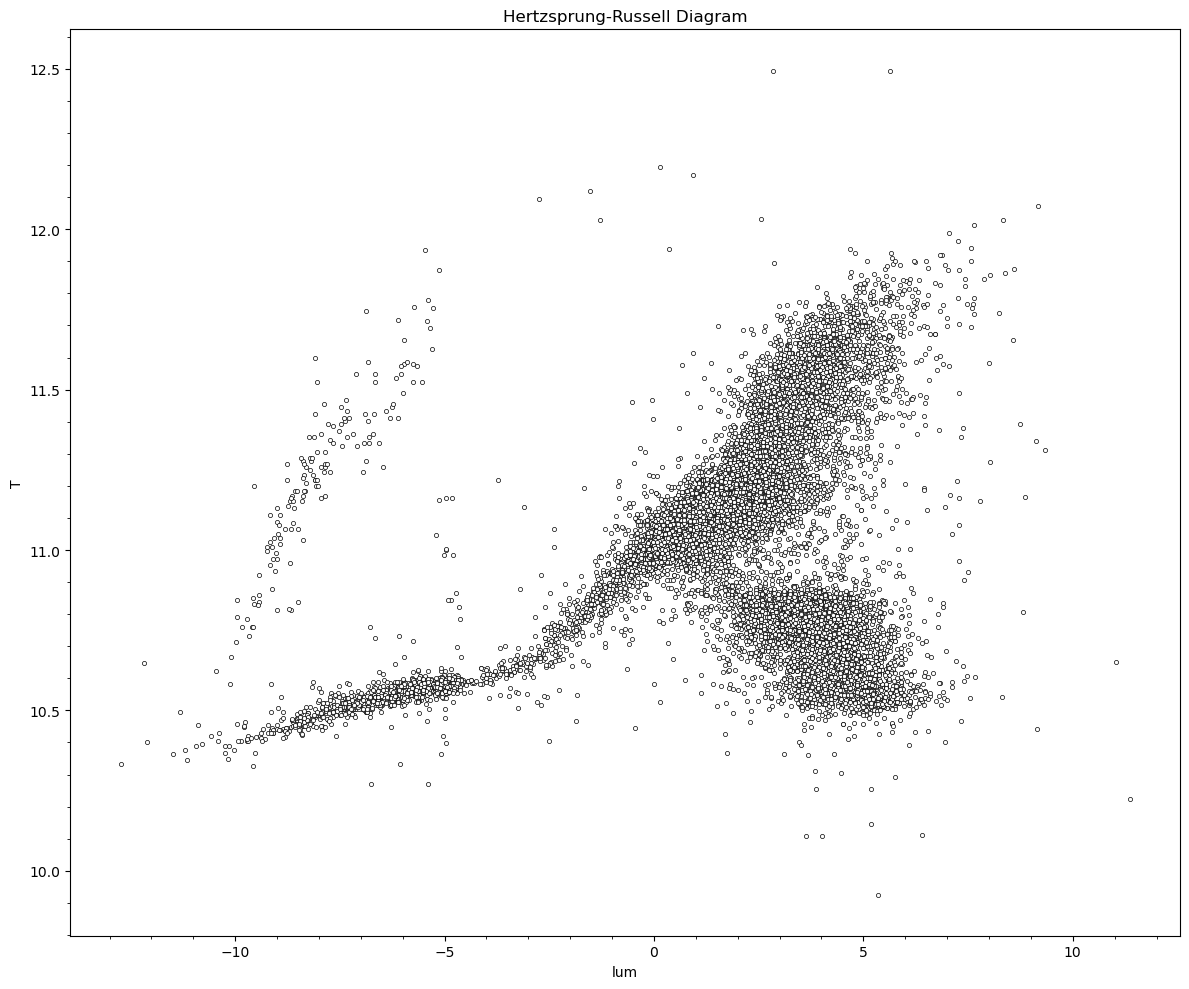

In [6]:
plt.figure(figsize=(12,10))
plt.scatter(lum, T, s=9, c='w', edgecolors='k', linewidth=0.5)
plt.xlabel('lum')
plt.ylabel('T')
plt.title('Hertzsprung-Russell Diagram')
plt.minorticks_on()
plt.show()

In [62]:
avgmin = avragg.Minimal()
# avgmin = avragg.SoftMinimal(22)

avrfunc = averager_it(func.QuantileFunc(0.98, func.Sqrt(0.001)))
avrfunc = avragg.WMAverage(avrfunc)
hcd = mlocation_scatter.MLocationsScattersEstimator(avrfunc, avgmin, 6, 
                                    tol=1.0e-9, n_iter=600)

In [63]:
hcd.fit(X)

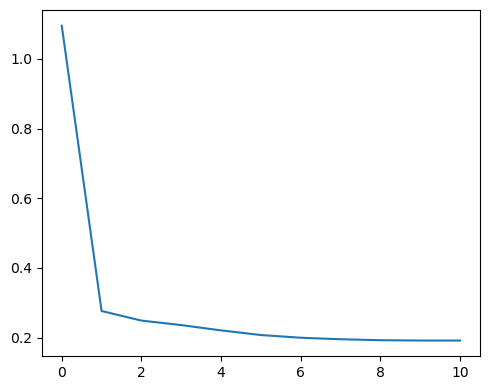

In [64]:
plt.figure(figsize=(5,4))
plt.plot(hcd.dvals2)
plt.show()

In [65]:
xrange1 = np.linspace(lum.min(),lum.max(), 100)
xrange2 = np.linspace(T.min(),T.max(), 100)
XX1, XX2, = np.meshgrid(xrange1, xrange2)
XX = np.c_[XX1.ravel(), XX2.ravel()]
D = hcd.evaluate_dist(XX)
DD = D.reshape(XX1.shape)
print(D.min(), D.max())

2.494340661022256e-05 58.106421925496655


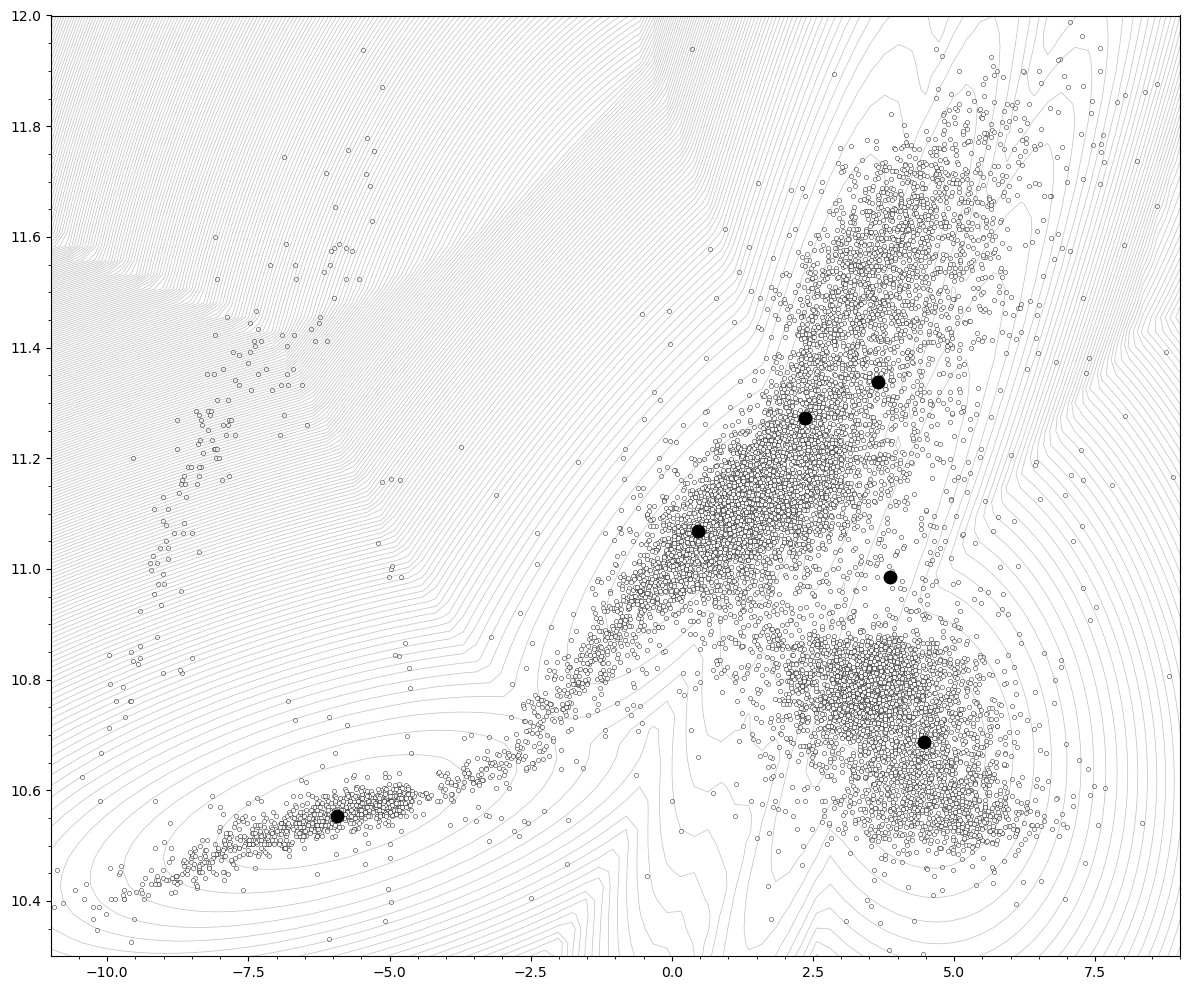

In [66]:
plt.figure(figsize=(12,10))
plt.contour(DD, origin='lower', extent=(lum.min(),lum.max(),T.min(),T.max()), 
            levels=np.linspace(DD.min(),DD.max(),300), colors='k', linewidths=0.5, alpha=0.25)
plt.scatter(X[:,0], X[:,1], c='w', edgecolors='k', marker='o', s=9, linewidth=0.3)
plt.scatter(hcd.locs[:,0], hcd.locs[:,1], c='k', edgecolors='k', s=81)
plt.xlim(-11,9)
plt.ylim(10.3,12)
plt.minorticks_on()
plt.show()

### Среднее арифметическое

In [12]:
arith = avragg.ArithMean()
km = mlocation_scatter.MLocationsScattersEstimator(arith, avgmin, 7, 
                                    tol=1.0e-8, n_iter=600)

In [13]:
km.fit(X)

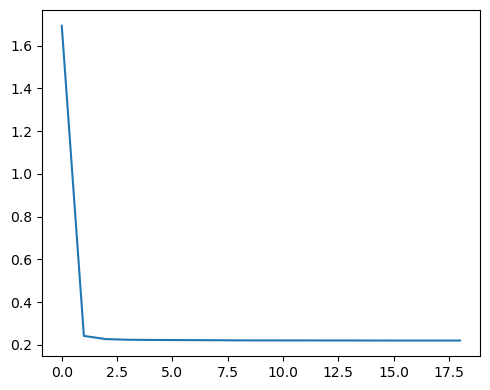

In [14]:
plt.figure(figsize=(5,4))
# plt.subplot(1,2,1)
# plt.plot(km.dvals)
# plt.subplot(1,2,2)
plt.plot(km.dvals2)
plt.show()

In [15]:
xrange1 = np.linspace(lum.min(),lum.max(), 100)
xrange2 = np.linspace(T.min(),T.max(), 100)
XX1, XX2, = np.meshgrid(xrange1, xrange2)
XX = np.c_[XX1.ravel(), XX2.ravel()]
D2 = km.evaluate_dist(XX)
# C = hcd.evaluate(XX)
# CC = np.asarray(C).reshape(XX1.shape)
DD2 = D2.reshape(XX1.shape)
print(D2.min(), D2.max())

8.744746863534732e-05 24.525116417753985


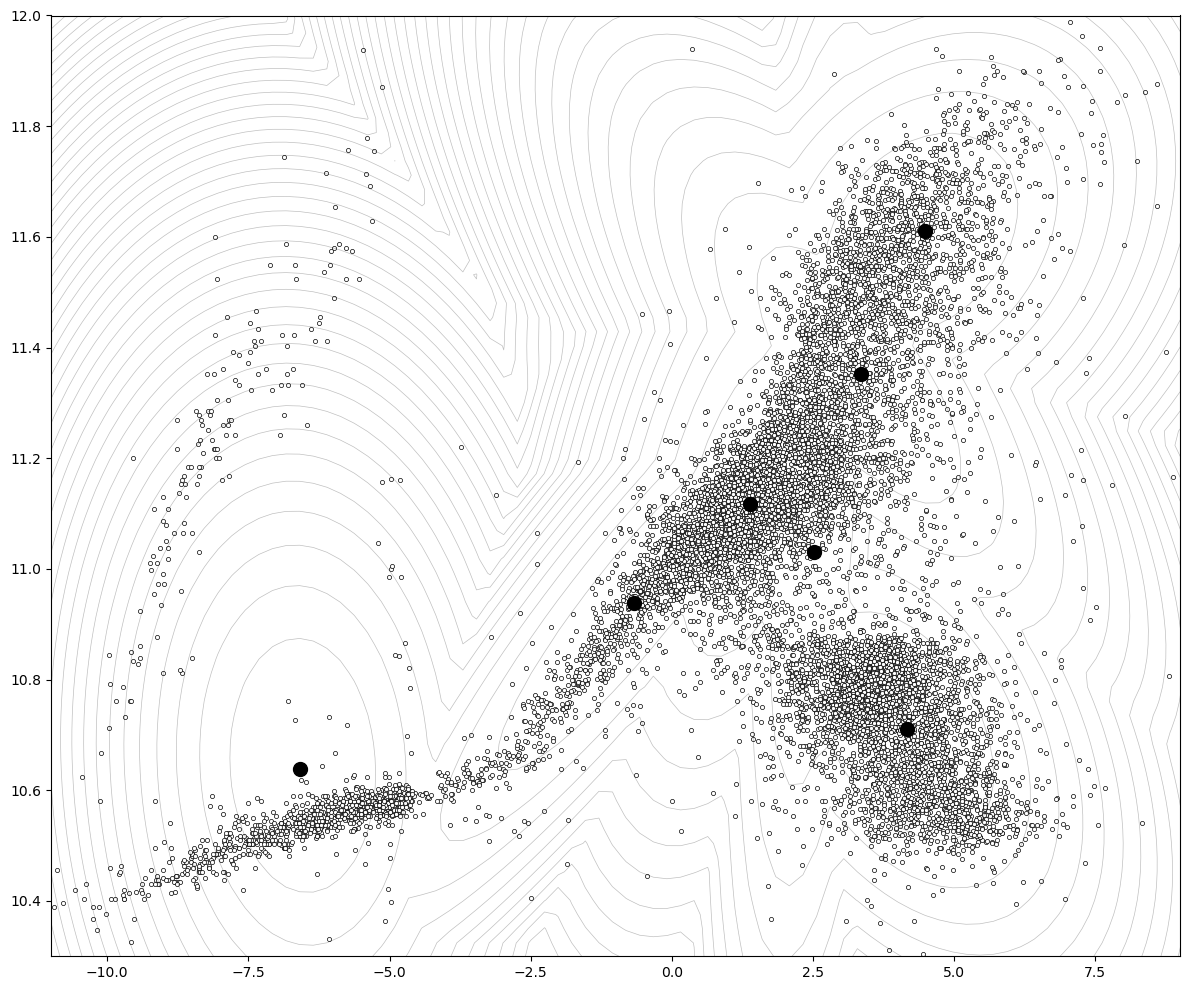

In [16]:
plt.figure(figsize=(12,10))
plt.contour(DD2, origin='lower', extent=(lum.min(),lum.max(),T.min(),T.max()), 
            levels=np.linspace(0.,30,100), colors='k', linewidths=0.5, alpha=0.25)
plt.scatter(X[:,0], X[:,1], c='w', edgecolors='k', marker='o', s=9, linewidth=0.5)
plt.scatter(km.locs[:,0], km.locs[:,1], c='k', edgecolors='k', s=100)
plt.xlim(-11,9)
plt.ylim(10.3,12)
plt.show()